In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('C:/Users/biize/Downloads/Indicim - DataScience/desafio_indicium_imdb.csv')

In [3]:
base.head(1)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


Notei que há uma coluna que não faz muito sentido na base. A coluna Unnamed:0 aparenta ser uma contagem tipo um index, que já existe. Concluo que ela pode ser excluida da base.

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Há alguns valores nulos nas colunas que podem ser tratados ou em alguns casos excluidos(podendo excluir até a coluna por completo) dependendo da sua importancia para a analise. 

É possivel notar também que alguns dados estão com tipos inapropriados e para melhorar a analise é necessario fazer a conversão.

In [5]:
base.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


Esses são os dados estatisticos apenas das colunas númericas. Primeiraamente,  pode-se notar uma discrepância na coluna Meta_score, com nota minima de 28 e maxima de 100. 

Assim como observo que o desvio padrão da colunas IMDB_Rating é baixissimo, concluindo-se a baixa diversidade de notas. 

Por último, a media e a mediana das colunas IMDB_Rating e Meta_score estão equilibradas, o que significa que para essas colunas, não há discrepancias nos seus valores.

In [6]:
base.duplicated().sum() #Não há dados duplicados.

np.int64(0)

In [7]:
base.drop('Unnamed: 0', axis=1,inplace=True) #Eliminando uma coluna desnecessária

In [8]:
base = base[base['Released_Year'] != 'PG']
base['Released_Year'] = base['Released_Year'].astype(int)

Achei importante converter a coluna do ano de lançamento que estava em string para um inteiro(Não converti para datetime por que tem apenas o ano e não a data completa). 

Porém ao tentar fazer a conversão me deparei com um erro que indicava uma linha inválida por não ter esrito o ano mesmo que em formato de string e sim as letras PG. 

Então retornei a base de dados para ela mesma, excluindo essa linha. Só depois foi possivel fazer a conversão.

In [9]:
base['Gross'] = base['Gross'].str.replace(r'[^0-9]','',regex=True)
base['Gross'] = base['Gross'].astype(float)

Para a coluna Gross, que é o faturamento fiz a conversão para o tipo float. Para isso, antes foi necessário substituir todos os caracteres não numericos por strings vazias e só depois fazer a conversão. 

Acredito que esse é o tipo mais adequado para esse dado por ser um valor financeiro que usa-se casas decimais e para que ele possa ser analisado estatisticamente.

In [10]:
base.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,998.000000,841.000000,9.980000e+02,8.290000e+02
mean,1991.214429,7.948297,77.970273,2.716239e+05,6.795500e+07
std,23.308539,0.272203,12.390581,3.210735e+05,1.098123e+08
min,1920.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,7.700000,70.000000,5.541675e+04,3.237118e+06
50%,1999.000000,7.900000,79.000000,1.381685e+05,2.338399e+07
75%,2009.000000,8.100000,87.000000,3.735062e+05,8.050000e+07
max,2020.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


Ao converter a coluna de faturamento, posso perceber que não há um equilibrio entre a media e mediana indicando números discrepantes. 

Ao tratar os valores nulos, optarei por preenche - los com a mediana dos valores tanto da coluna Meta_score, quanto da coluna Gross para que haja um equilibrio no seu preenchimento. Algo que a média não traria.

In [11]:
base['Gross'] = base['Gross'].fillna(base['Gross'].median())
base['Meta_score'] = base['Meta_score'].fillna(base['Meta_score'].median())             

Decidi tratar a coluna Runtime, que apresenta o tempo do filme, porém em formato de string.

Esse pode ser um dos fatores pelo qual alguém desista ou deseje assistir o filme, então acho importante inclui - lo.

In [12]:
base['Runtime'] = base['Runtime'].str.replace(r'[^0-9]','', regex=True) #Eliminando caracteres não númericos
base['Runtime'] = base['Runtime'].astype(int)
base.rename(columns={'Runtime':'Runtime_Min'},inplace=True) #Julguei necessário renmear a coluna para que ela ficasse mais clara após a conversão dos seus dados 

In [13]:
remover = ['Approved','TV-PG','GP','TV-14','Unrated','Passed','TV-MA','16']
base = base[~base['Certificate'].isin(remover)]

legenda = {'A':'Adult','R':'Adult','U':'All Ages','G':'All Ages','U/A':'Parental Guidance',
          'UA':'Parental Guidance','PG':'Parental Guidance','PG-13':'Parents Strongly Cautioned'}

base['Certificate'] = base['Certificate'].fillna('Unknown')
           
base['Certificate'] = base['Certificate'].replace(legenda)

Tratando a coluna Certificate com as legendas adequadas para a classificação etária e preechendo os valores nulos.

Segui principalmente a legenda sugerida pelo site: Motion Picture Association

In [14]:
correlacao = base[['Released_Year','Runtime_Min','IMDB_Rating','Meta_score','No_of_Votes','Gross']].corr()
#Avaliando a correlação das variaveis.

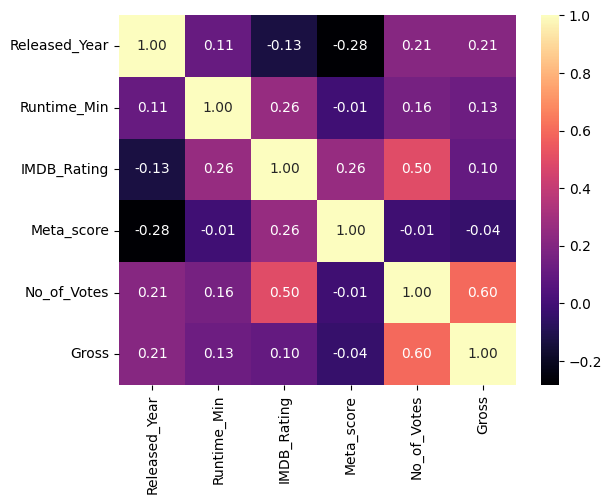

In [15]:
sns.heatmap(correlacao,annot=True,cmap="magma",fmt=".2f")
plt.show()
#Visualização da correlação linear.(Positivo mais próxima de 1 a correlação é alta nem tão próxima é moderada. 
#Negativas ou próximas ao zero, baixa ou nenhuma correlação)

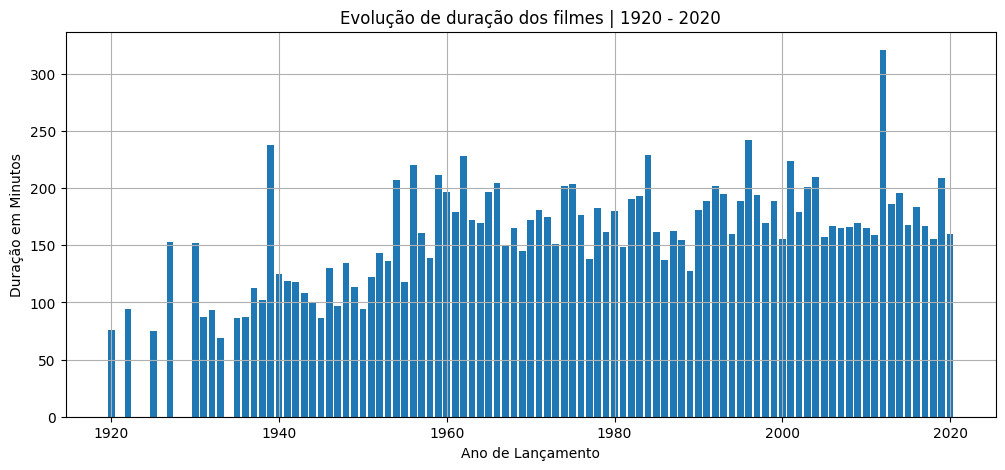

In [16]:
plt.figure(figsize=(12,5))
plt.bar(base['Released_Year'],base['Runtime_Min'])
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração em Minutos')
plt.title('Evolução de duração dos filmes | 1920 - 2020')
plt.grid(True)
plt.show()

Interessante notar essa correlação entre a duração do filme e o ano de lançamento. A tendência aqui indica um aumento de duração, porém com dados que vão até 2020. 

Será que em 2025 e anos por vir essa tendencia continuaria? Podemos observar o contexto e a sociedade atualmente, mas o que será que os dados dizem? 

Será que filmes com maiores durações são populares ou atraem um público diverso, visto que hoje em dia há uma 'urgência' para consumir conteúdo de forma rápida? Se sim, quais fatores atraem esse público?

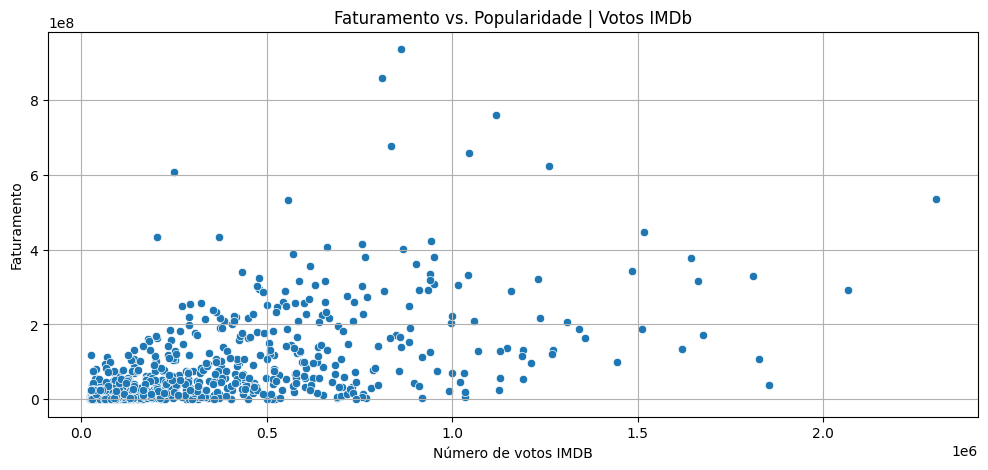

In [17]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='No_of_Votes',y='Gross',data=base)
plt.xlabel('Número de votos IMDB')
plt.ylabel('Faturamento')
plt.title('Faturamento vs. Popularidade | Votos IMDb')
plt.grid(True)
plt.show()

Alta correlação entre o número de votos no IMDb e o faturamento do filme, o que faz sentido já que o voto são das pessoas que o assistiu. 

Quanto mais pessoas assitirem, maior será a quantidade de pessoas votantes e maior será o seu faturamento. 

Porém há uma outra questão, existem filmes que foram lançados antes da criação do IMDb, que podem até ter votos atualmente, mas não expressam o sentimento ou a popularidade que o filme pode ter causado na epoca em que foi lançado. 

In [18]:
indicar_filmes = base.loc[(base['IMDB_Rating'] >= 8.5) & (base['Meta_score'] >= 85)]
indicar_filmes.head(7)

,Series_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,Adult,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Godfather: Part II,1974,Adult,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,All Ages,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,All Ages,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
5,Pulp Fiction,1994,Adult,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
6,Schindler's List,1993,Adult,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
9,The Lord of the Rings: The Fellowship of the Ring,2001,All Ages,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0


Escolhi as variaveis de notas(da critica e popular). Isso indica qualidade, mas também a popularidade do filme. 

Eu indicaria sem dúvidas: The Godfather(1972) que é um filme atemporal com uma nota 9.2 de popularidade, ou seja, segundo o próprio IMBd uma obra-prima, que vale a pena ser visto e que também tem nota máxima da critica, reforçando a sua qualidade e unanimidade. 

Como segunda opção indicaria: The Lord of the Rings: The Fellowship of the Ring(2001) que possui boas notas(critica e popularidade) mas que também faz parte de generos populares e é aberto a todas as idades. Caso a pessoa tenha uma familia por exemplo, poderá agradar a todos com a escolha.


In [19]:
alto_faturamento = base.loc[(base['Gross'] >= 700000000)]
alto_faturamento

,Series_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
58,Avengers: Endgame,2019,Parental Guidance,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
476,Star Wars: Episode VII - The Force Awakens,2015,All Ages,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
622,Avatar,2009,Parental Guidance,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0


In [20]:
baixo_faturamento = base.loc[(base['Gross'] <= 10000000)]
baixo_faturamento.head(7)

,Series_Title,Released_Year,Certificate,Runtime_Min,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
3,12 Angry Men,1957,All Ages,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
11,"Il buono, il brutto, il cattivo",1966,Adult,161,Western,8.8,A bounty hunting scam joins two men in an unea...,90.0,Sergio Leone,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffrè,688390,6100000.0
21,Cidade de Deus,2002,Adult,130,"Crime, Drama",8.6,"In the slums of Rio, two kids' paths diverge a...",79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7563397.0
30,Shichinin no samurai,1954,All Ages,207,"Action, Adventure, Drama",8.6,A poor village under attack by bandits recruit...,98.0,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,315744,269061.0
39,American History X,1998,Adult,119,Drama,8.5,A former neo-nazi skinhead tries to prevent hi...,62.0,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864.0
47,Once Upon a Time in the West,1968,All Ages,165,Western,8.5,A mysterious stranger with a harmonica joins f...,80.0,Sergio Leone,Henry Fonda,Charles Bronson,Claudia Cardinale,Jason Robards,302844,5321508.0
49,Casablanca,1942,All Ages,102,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,1024560.0


Escolhi filtrar filmes com altos e baixos faturamentos para entender o contexto. 

As grandes produções de hollywood com diretores mais conhecidos, superstars e o gereno populares tendem a ter um faturamento mais elevado.

Por outro lado, filmes em outras linguas, com generos que não são tão populares tendem a ter um faturamento menor, mesmo que tenha qualidade

Em suma, as variaveis que estão associadas as expectativas de faturamento variam entre: diretores, o estúdio que será produzido(ou seja, se será uma grande produção), o elenco, o idioma, bem como o genero do filme.

Não consegui implementar a solução do requisito de inferência de gênero. 

Durante a resolução do desafio aprendi bastante, sobretudo os conceitos de machine learning, o que me deixou ainda mais animada para continuar estudando. 

Nas minhas pesquisas entendi que, para realizar essa inferência de forma adequada, seria necessário aplicar técnicas de machine learning, 
que ainda estou aprendendo e não consigo compreender claramente como aplicar. 

Então decidi priorizar os requisitos que consigo resolver com mais segurança e clareza.